# **CSE655 Homework 1**

### **Part 1: Training a deep feed forward network for multidimensional regression.**
Assume that you are given a polynomial with multiple (8) inputs and multiple outputs (6) of the form:
\begin{align*}
(y_1​, y_2​, …, y_6​) = P(x_1​, x_2​, …, x_8​)
\end{align*}

\begin{align*}
y_1 &= x_1 x_3 + 1.2 x_1 x_5 - x_6 x_7 x_8 - 2 x_1^2 x_8 + x_5 \\
y_2 &= x_1 x_5 x_6 - x_3 x_4 - 3 x_2 x_3 + 2 x_2^2 x_4 - 2 x_7 x_8 - 1 \\
y_3 &= 2 x_3^2 - x_5 x_7 - 3 x_1 x_4 x_6 - x_1^2 x_2 x_4 - 1 \\
y_4 &= -x_6^3 + 2 x_1 x_3 x_8 - x_1 x_4 x_7 - 2 x_5^2 x_2 x_4 - x_8 \\
y_5 &= x_1^2 x_5 - 3 x_3 x_4 x_8 + x_1 x_2 x_4 - 3 x_6 - x_1^2 x_7 + 2 \\
y_6 &= x_1^2 x_3 x_6 - x_3 x_5 x_7 + x_3 x_4 + 2.2 x_4 + x^2_2 x_3 - 2.1
\end{align*}



In [70]:
def function(x):
    x1, x2, x3, x4, x5, x6, x7, x8 = x
    
    y1 = x1 * x3 + 1.2 * x1 * x5 - x6 * x7 * x8 - 2 * x1**2 * x8 + x5
    y2 = x1 * x5 * x6 - x3 * x4 - 3 * x2 * x3 + 2 * x2**2 * x4 - 2 * x7 * x8 - 1
    y3 = 2 * x3**2 - x5 * x7 - 3 * x1 * x4 * x6 - x1**2 * x2 * x4 - 1
    y4 = -x6**3 + 2 * x1 * x3 * x8 - x1 * x4 * x7 - 2 * x5**2 * x2 * x4 - x8
    y5 = x1**2 * x5 - 3 * x3 * x4 * x8 + x1 * x2 * x4 - 3 * x6 - x1**2 * x7 + 2
    y6 = x1**2 * x3 * x6 - x3 * x5 * x7 + x3 * x4 + 2.2 * x4 + x2**2 * x3 - 2.1
    
    return [y1, y2, y3, y4, y5, y6]

Training and validation data:
* Given the polynomials, generate 𝑁t instances of data pairs of the form: 
\begin{align*} {(x_1^t, x_2^t, x_3^t ... x_8^t), (y_1^t, y_2^t ... y_6^t)} \end{align*}
* When needed, add some noise to the training data from a normal distribution with mean 𝜇 and standard deviation 𝜎 such that the training data becomes:
\begin{align*} {(x_1^t, x_2^t, x_3^t ... x_8^t), (y_1^t + 𝑁(𝜇,𝜎), y_2^t + 𝑁(𝜇,𝜎) ... y_6^t + 𝑁(𝜇,𝜎))} \end{align*}
* Similarly, create an additional 𝑁v instances:
\begin{align*} {(x_1^v, x_2^v, x_3^v ... x_8^v), (y_1^v, y_2^v ... y_6^v)} \end{align*}
for validation of the trained model.

In [71]:
import numpy as np

def dataGenerator(xlist, func, size):
    output = []
    i = 0
    while i < size:
        y = func(xlist[i])
        output.append(y)
        i += 1
    return output

def noiseGenerator(xlist, mean, sigma):
    output = []
    for y in xlist:
        noise = np.random.normal(mean, sigma, len(y))
        output.append(y + noise)
    return output


#### **Model training:**

1. Choose 𝑁t to be 1000.
2. In your training data add some noise to 𝑦_i’s from a normal distribution with 𝜇 = 0.0 and 𝜎 = 0.001.

In [72]:
# Model training
Nt = 1000
Nv = 1000
noiseMean = 0.0
noiseStddev = 0.001

xt = np.random.random((Nt, 8)).tolist() # Training Input array
yt = dataGenerator(xt, function, Nt)    # Training Output array
yt = noiseGenerator(yt, noiseMean, noiseStddev)

xv = np.random.random((Nv, 8)).tolist() # Validation Input array
yv = dataGenerator(xv, function, Nv)    # Validation Output array


3. Build a feed forward network with exactly 3 hidden layers:
* Each layer should include exactly 6 nodes in the beginning.
* Use a combination of activation functions in these layers (use the same activation for each node at a given layer).
4. Define your loss function:
* Use MSE for loss function.
5. Train your algorithm with SGD.
* Use appropriate learning rates and the number of epochs.
* Report the training and validation errors.

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4257 - mse: 1.4257 - val_loss: 1.2261 - val_mse: 1.2261
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1456 - mse: 1.1456 - val_loss: 1.0060 - val_mse: 1.0060
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9937 - mse: 0.9937 - val_loss: 0.8419 - val_mse: 0.8419
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8593 - mse: 0.8593 - val_loss: 0.7389 - val_mse: 0.7389
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7458 - mse: 0.7458 - val_loss: 0.6820 - val_mse: 0.6820
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6988 - mse: 0.6988 - val_loss: 0.6515 - val_mse: 0.6515
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6921 - mse: 0.6921 - val_loss: 0.6346 - val_mse: 0.6346
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6712 - mse: 0.6712 - val_loss: 0.6256 - val_mse: 0.6256
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.647

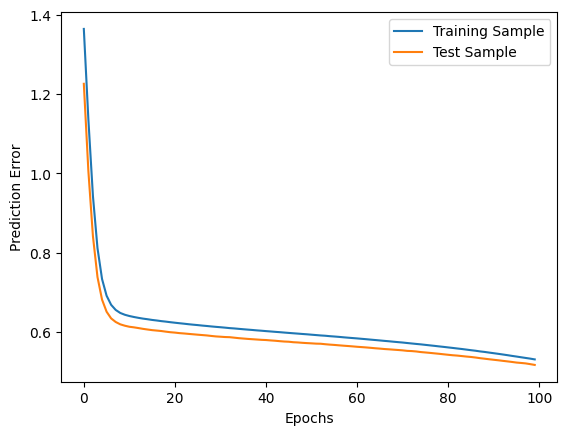

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

epochs = 100
learningRate = 0.05
model = Sequential()

model.add(Dense(6, input_shape=(8,), activation='relu')) 
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))

model.add(Dense(6, activation='linear')) # Output layer : 6 neuron, linear

# Compile 
sgd = SGD(learning_rate=learningRate)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# Train
history = model.fit(
    np.array(xt), 
    np.array(yt), 
    validation_data=(np.array(xv), np.array(yv)),
    epochs=epochs, 
    batch_size=32, 
    verbose=1
)

# Plot
plt.plot(history.history['mse'], label='Training Sample')
plt.plot(history.history['val_mse'], label='Test Sample')
plt.xlabel('Epochs')
plt.ylabel('Prediction Error')
plt.legend()
plt.show()
